# Equilibrium Model Solver Example 

In [2]:
from solver_func import * 
from nlw_eos import *
import matplotlib.pyplot as plt 
%config InlineBackend.figure_formats = ['svg']

## NPE$\mu$ Big Apple
1. We declare a `baryon_list`, `meson_list`, and `lepton_list` which consists of the particles that we'd like to be present. To include more particles in the future, one would need to add them to `nlw_classes.py` helper file by hand. 
2. Then call `full_solve` substituting in the various arguments. The first argument is the model, in this case `big_apple` as found in `nlw_eos.py`. To consider more models, one would need to add the model there. 
3. The output is saved as a `.csv` file with the following information as shown below. It calculates the particle fraction (equivalent to momenta $k_F$) and meson field values. With this we can then get $p,\epsilon$ which we can then plot. 

In [3]:
baryon_list = [Neutron, Proton]
meson_list = [sigma, omega, rho, phi] 
lepton_list = [electron, muon]

In [4]:
npemu_bigapple = full_solve(big_apple, baryon_list, meson_list, lepton_list, initial_guess = [7.9, 4.50, -2.25, 0.01, 210.0, 45.0, 45.0], csv_name = './Example Output/npemu_bigapple', meth = 'hybr')
npemu_bigapple 

,nB/n0,sigma field (MeV),omega field (MeV),rho field (MeV),phi field (MeV),Neutron kF (MeV),Proton kF (MeV),electron kF (MeV),muon kF (MeV),Neutron frac,Proton frac,electron frac,muon frac,Neutron chem pot,Proton chem pot,electron chem pot,muon chem pot,P (MeV/fm3),E Dens (MeV/fm3)
0,0.27,11.357294,6.112387,-3.053680,1.263265e-25,208.808865,66.471261,66.471261,0.000000,0.968749,0.031251,0.031251,0.000000,951.939635,885.466418,66.473217,0.000000,0.167633,39.157012
1,0.28,11.743585,6.326181,-3.124639,3.592593e-47,211.276048,68.057376,68.057376,0.000000,0.967656,0.032344,0.032344,0.000000,952.060821,884.001534,68.059287,0.000000,0.172576,40.613728
2,0.29,12.128120,6.539373,-3.192699,-2.297336e-68,213.684098,69.599410,69.599410,0.000000,0.966600,0.033400,0.033400,0.000000,952.168533,882.567255,69.601278,0.000000,0.177117,42.070620
3,0.30,12.510948,6.752015,-3.257919,-2.172617e-90,216.036609,71.098660,71.098660,0.000000,0.965582,0.034418,0.034418,0.000000,952.263703,881.163214,71.100489,0.000000,0.181256,43.527667
4,0.31,12.892117,6.964160,-3.320356,5.167005e-108,218.336853,72.556402,72.556402,0.000000,0.964601,0.035399,0.035399,0.000000,952.347260,879.789065,72.558195,0.000000,0.185000,44.984850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,7.96,89.179675,167.365459,-0.578771,0.000000e+00,618.903997,341.997311,281.347733,260.758287,0.855628,0.144372,0.080380,0.063993,2688.265920,2406.917725,281.348195,281.348195,1238.015284,2036.101386
770,7.97,89.187474,167.538328,-0.578303,0.000000e+00,619.161834,342.144484,281.460595,260.880058,0.855623,0.144377,0.080375,0.064002,2690.637521,2409.176464,281.461058,281.461058,1240.905294,2040.216684
771,7.98,89.195254,167.711100,-0.577836,0.000000e+00,619.419458,342.291526,281.573361,261.001715,0.855618,0.144382,0.080371,0.064011,2693.007775,2411.433952,281.573823,281.573823,1243.797288,2044.335610
772,7.99,89.203014,167.883776,-0.577371,0.000000e+00,619.676869,342.438438,281.686030,261.123261,0.855613,0.144387,0.080367,0.064020,2695.376681,2413.690189,281.686492,281.686492,1246.691262,2048.458161


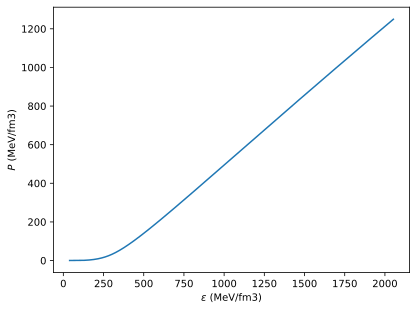

In [11]:
e_dens = npemu_bigapple.loc[:, 'E Dens (MeV/fm3)']
press = npemu_bigapple.loc[:, 'P (MeV/fm3)']
plt.plot(e_dens, press)
plt.xlabel('$\epsilon$ (MeV/fm3)')
plt.ylabel('$P$ (MeV/fm3)')
plt.show()

## NPE$\mu$Y Big Apple
1. Now we include hyperons. All we need to do here is to adjust the `baryon_list` to include hyperons. 

In [12]:
baryon_list = [Neutron, Proton, Lambda, Sigma_min, Xi_min, Xi_neu, Sigma_plus, Sigma_neu]
meson_list = [sigma, omega, rho, phi] 
lepton_list = [electron, muon]

In [13]:
npemuy_bigapple = full_solve(big_apple, baryon_list, meson_list, lepton_list, initial_guess = [7.9, 4.50, -2.25, 0.01, 210.0, 45.0, 45.0], csv_name = './Example Output/npemuy_bigapple', meth = 'hybr')
npemuy_bigapple 

,nB/n0,sigma field (MeV),omega field (MeV),rho field (MeV),phi field (MeV),Neutron kF (MeV),Proton kF (MeV),electron kF (MeV),muon kF (MeV),Lambda kF (MeV),...,electron chem pot,muon chem pot,Lambda chem pot,Xi_min chem pot,Sigma_min chem pot,Xi_neu chem pot,Sigma_plus chem pot,Sigma_neu chem pot,P (MeV/fm3),E Dens (MeV/fm3)
0,0.27,11.357294,6.112387,-3.053680,1.263265e-25,208.808865,66.471261,66.471261,0.0,0.000000,...,66.473217,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.167633,39.157012
1,0.28,11.743585,6.326181,-3.124639,3.592593e-47,211.276048,68.057376,68.057376,0.0,0.000000,...,68.059287,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.172576,40.613728
2,0.29,12.128120,6.539373,-3.192699,-2.297336e-68,213.684098,69.599410,69.599410,0.0,0.000000,...,69.601278,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.177117,42.070620
3,0.30,12.510948,6.752015,-3.257919,-2.172617e-90,216.036609,71.098660,71.098660,0.0,0.000000,...,71.100489,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.181256,43.527667
4,0.31,12.892117,6.964160,-3.320356,5.167005e-108,218.336853,72.556402,72.556402,0.0,0.000000,...,72.558195,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.185000,44.984850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,7.96,103.447877,130.588717,-0.319559,3.974427e+01,405.812048,352.337874,57.307671,0.0,495.471717,...,57.309940,0.0,2020.439497,2077.749437,2077.749437,2020.439497,0.0,0.0,737.652184,1723.078947
770,7.97,103.490671,130.705003,-0.318811,3.982272e+01,405.771547,352.438255,57.149003,0.0,495.786244,...,57.151278,0.0,2021.887873,2079.039151,2079.039151,2021.887873,0.0,0.0,739.417098,1726.171655
771,7.98,103.533612,130.821175,-0.318066,3.990125e+01,405.730798,352.537806,56.990908,0.0,496.100599,...,56.993190,0.0,2023.335249,2080.328439,2080.328439,2023.335249,0.0,0.0,741.183009,1729.266580
772,7.99,103.576701,130.937233,-0.317323,3.997985e+01,405.689782,352.636537,56.833361,0.0,496.414811,...,56.835650,0.0,2024.781636,2081.617285,2081.617285,2024.781636,0.0,0.0,742.949926,1732.363718


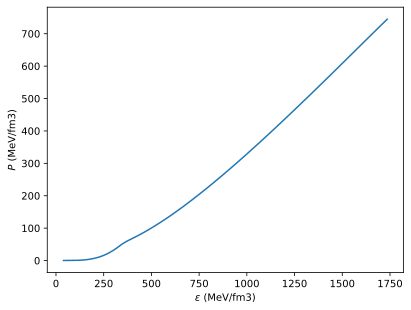

In [14]:
e_densy = npemuy_bigapple.loc[:, 'E Dens (MeV/fm3)']
pressy = npemuy_bigapple.loc[:, 'P (MeV/fm3)']
plt.plot(e_densy, pressy)
plt.xlabel('$\epsilon$ (MeV/fm3)')
plt.ylabel('$P$ (MeV/fm3)')
plt.show()